In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
import numpy as np
import keras.utils as image
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

2023-09-10 19:05:05.103251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 19:05:05.141442: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 19:05:05.142090: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 19:05:05.895192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
def Augment_data(img_path,Aug_dir):
    aug_img=[]
    image=Image.open(img_path)
    image=image.resize((400,400))
    width, height = image.size
    aug_img.append(np.array(ImageOps.grayscale(image)))
    aug_img.append(np.array(ImageOps.equalize(image)))
    image = np.array(image)
    aug_img.append(image)
    Noise = np.random.normal(0,10, (height, width,3)).astype(np.uint8)
    aug_img.append(image+Noise)
    aug_img.append((-1 * image + 255).astype(np.uint8))
    aug_img.append((5*image+255).astype(np.uint8))
    aug_img.append((cv2.GaussianBlur(image,(5,5),sigmaX=10,sigmaY=10)).astype(np.uint8))
    for i in range(len(aug_img)):
        plt.imsave(f'{Aug_dir}/{img_path.split("/")[-1]}{i}.jpg',aug_img[i])

In [20]:
for i in folders:
    files=os.listdir(f'data/{i}')
    for j in files:
        Augment_data(f'data/{i}/{j}',f'Aug_data/{i}')

In [12]:
f'data/{i}/{j}'.split('/')[-1]

'Nangka312.jpg'

In [278]:
for j in img:
    print(type(j))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


AttributeError: 'Axes' object has no attribute '__array_interface__'

In [18]:
for i in folders:
    os.mkdir(f'Aug_data/{i}')


In [3]:
show_file=[f'data/{i}/{Test_files[-1]}',f'data/{i}/{Test_files[-2]}',f'data/{i}/{Test_files[-3]}']
show_file=f'data/{i}/{Test_files[-1]}'

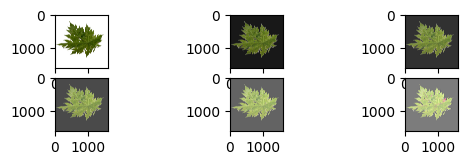

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
show_file='data/Pepaya/Pepaya008.jpg'
j=1
change_fac=0
for i in range(1,7):
    sp = plt.subplot(6,3,i)
    img = Image.open(show_file)
    img=img.resize((1600,1600))
    img=np.array(img)+change_fac
    plt.imshow(img)
    change_fac+=25
plt.savefig('leaf.png')

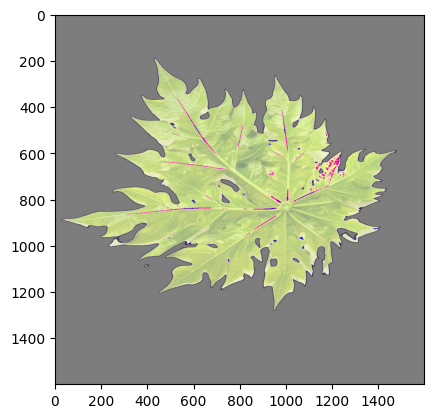

In [5]:
plt.imshow(img+1)
plt.savefig('leaf1.png')

In [23]:
import shutil
folders=os.listdir('Aug_data')
os.mkdir('train')
os.mkdir('test')
for i in folders:
    os.mkdir(f'train/{i}')
    os.mkdir(f'test/{i}')
Train_files=[]
Test_files=[]
for i in folders:
    all_files=os.listdir(f'Aug_data/{i}')
    Train_files,Test_files=train_test_split(all_files,test_size=0.2)
    for j in Train_files:
        shutil.copy(f'Aug_data/{i}/{j}',f'train/{i}')
    for j in Test_files:
        shutil.copy(f'Aug_data/{i}/{j}',f'test/{i}')

In [24]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
training_set = train_datagen.flow_from_directory('train',target_size=(400,400),
                                                 batch_size = 10
                                                 ,classes=os.listdir('data'))
test_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
                                  
        horizontal_flip=True,
        fill_mode='nearest')
validation_set = test_datagen.flow_from_directory('test',target_size=(400,400),
                                            batch_size = 10,classes=os.listdir('data'))

Found 19600 images belonging to 10 classes.
Found 4900 images belonging to 10 classes.


In [25]:
for i in training_set:
    print(i[0].shape)
    break

(10, 400, 400, 3)


In [26]:
tf.keras.backend.clear_session()
inputs=inputs = tf.keras.Input(shape=(400,400,3))
convo1= tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(inputs)
maxpool1=tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(convo1)
convo2= tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(maxpool1)
maxpool2=tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(convo2)
#normalize=tf.keras.layers.BatchNormalization()(maxpool2)
flatten=tf.keras.layers.Flatten()(maxpool2)
dropout1=tf.keras.layers.Dropout(0.5)(flatten)
dence1=tf.keras.layers.Dense(100,activation='relu')(dropout1)
dence2=tf.keras.layers.Dense(75,activation='relu')(dence1)
dence3=tf.keras.layers.Dense(50,activation='relu')(dence2)
dence4=tf.keras.layers.Dense(25,activation='relu')(dence3)
dropout2=tf.keras.layers.Dropout(0.5)(flatten)
dence5=tf.keras.layers.Dense(100,activation='relu')(dropout2)
dence6=tf.keras.layers.Dense(75,activation='relu')(dence5)
dence7=tf.keras.layers.Dense(50,activation='relu')(dence6)
dence8=tf.keras.layers.Dense(25,activation='relu')(dence7)
#outputs=tf.keras.layers.Dense(10,activation='softmax')(dence1)
conc=tf.keras.layers.Concatenate()([dence4,dence8])
outputs = tf.keras.layers.Dense(10, activation='softmax')(conc)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

2023-09-10 19:57:32.125798: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240870400 exceeds 10% of free system memory.
2023-09-10 19:57:32.191388: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240870400 exceeds 10% of free system memory.
2023-09-10 19:57:32.228055: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240870400 exceeds 10% of free system memory.
2023-09-10 19:57:32.324829: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240870400 exceeds 10% of free system memory.
2023-09-10 19:57:32.395209: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240870400 exceeds 10% of free system memory.


In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 398, 398, 128)        3584      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 198, 198, 128)        0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 196, 196, 64)         73792     ['max_pooling2d[0][0]']   

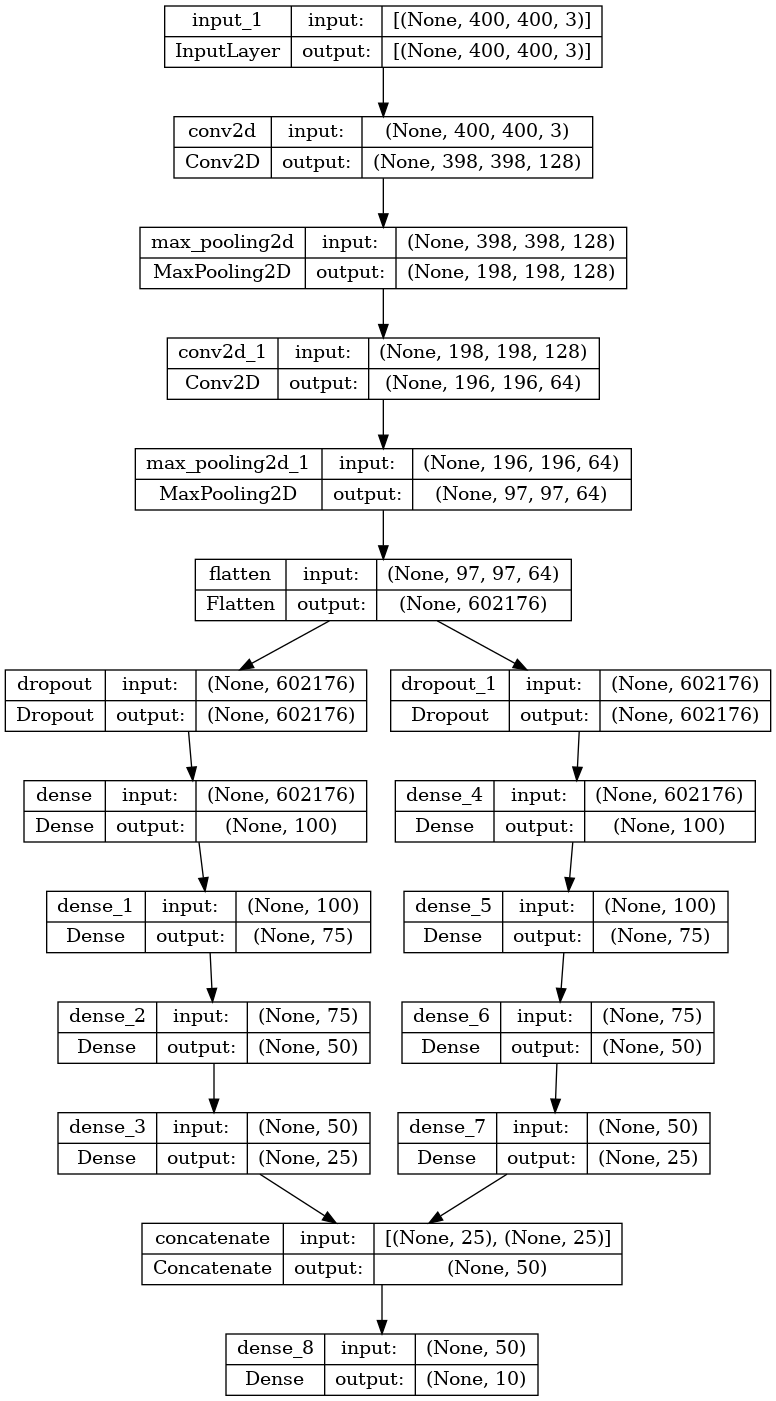

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history=model.fit(x = training_set, validation_data = validation_set, epochs = 15,steps_per_epoch=100)

Epoch 1/15


In [9]:
 print('The final accuracy of the model against validtion set: ',history.history['val_accuracy'][-1]*100,'%')

The final accuracy of the model against validtion set:  38.80000114440918 %


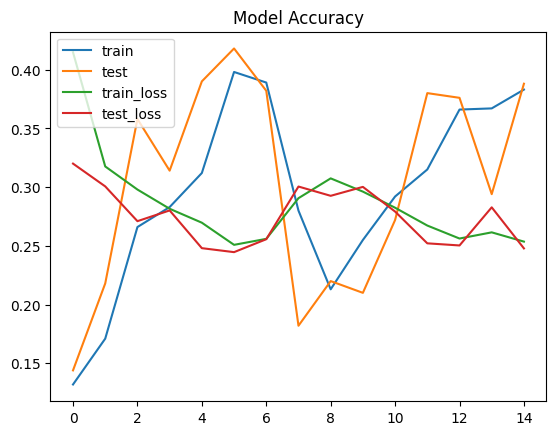

In [10]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy')
    plt.legend([ 'train','test','train_loss','test_loss'], loc='upper left')
    plt.savefig("loss.png")
    plt.show()
plot(history)